In [85]:
# multiple output lines 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import os
input_dir_raw = 'data/heise/'
input_file = os.path.join(os.path.abspath(input_dir_raw), 'heise.txt')
print(input_file)
with open(input_file, 'r', encoding='utf-8') as file:
    #line for line in file:
        
    
    _input = file.readlines()
    
    
len(_input)
_input=_input[:100]

C:\Users\Viktoria\Desktop\Github\pvtm\data\heise\heise.txt


In [2]:
%pwd

'C:\\Users\\Viktoria\\Desktop\\Github\\pvtm'

In [4]:
%load_ext autoreload
%autoreload 1
# %aimport dlutils

C:\Users\Viktoria\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


# Embeddings with DocumentPoolembeddings

In [4]:
import flair
from dlutils import dlutils
_input = [dlutils.preprocess_document(x) for x in _input]
_input, vocab = dlutils.popularity_based_prefiltering(_input, min_df = 0.01, max_df = 0.5, stopwords = dlutils.easy_stopwords())
n_topics = int(len(vocab)/ 100)

0.01 0.5
9375 words in the vocabulary


In [95]:
dlutils.preprocess_document(_input[1])

'Monsanto Attacks Scientists After Studies Show Trouble For Its New Weedkiller   The SaltScientists are accusing the seed and pesticide giant Monsanto of denying the risks of its latest weedkilling technology  Monsanto has responded by attacking some of its scientific critics Monsanto Attacks Scientists After Studies Show Trouble For Its New WeedkillerBob Scott  an expert on weeds with the University of Arkansas  in a research plot where soybeans were exposed to dicamba vapor  Dan Charles  NPR hide captiontoggle captionDan Charles  NPRBob Scott  an expert on weeds with the University of Arkansas  in a research plot where soybeans were exposed to dicamba vapor Dan Charles  NPRIn a normal year  Kevin Bradley  a professor of weed science at the University of Missouri  would have spent his summer testing new ways to control a troublesome little plant called water hemp This has not been a normal year  I don t even talk about weed management anymore   Bradley tells me  and he sounds disguste

In [5]:
from flair.embeddings import WordEmbeddings, BertEmbeddings,  FlairEmbeddings, DocumentPoolEmbeddings, Sentence, DocumentRNNEmbeddings


# init embedding
# de_embedding = WordEmbeddings('en')
# initialize the word embeddings
glove_embedding = WordEmbeddings('glove')
flair_embedding_forward = FlairEmbeddings('news-forward')
flair_embedding_backward = FlairEmbeddings('news-backward')

# initialize the document embeddings, mode = mean
document_embeddings = DocumentPoolEmbeddings([glove_embedding,
                                              flair_embedding_backward,
                                              flair_embedding_forward]) # mode can also be 'min' or 'max'.
# bert_embedding = BertEmbeddings('bert-base-multilingual-cased')

# initialize the word embeddings
# glove_embedding = WordEmbeddings('glove')
# german_forward = FlairEmbeddings('german-forward')
# german_backward = FlairEmbeddings('german-backward')


In [6]:
embeddings=[]
for text in _input:
    sentence = Sentence(text)
    document_embeddings.embed(sentence)
    embeddings.append(sentence.get_embedding().tolist())

In [28]:
from sklearn.mixture import GaussianMixture

n_topics=5
print('Topic modelling for', n_topics, 'topics')
gmm = GaussianMixture(n_components=n_topics, covariance_type='full')

gmm.fit(embeddings)
topic_assignment = gmm.predict(embeddings)

Topic modelling for 5 topics


In [29]:
# identify cluster center for every cluster
import numpy as np
cluster_centers=list()
for i in range(n_topics):
   # print(i)
    indices = np.where(topic_assignment==i)[0]
    center = np.array(embeddings)[indices].mean(axis=0)
    cluster_centers.append(center)

In [30]:
from sklearn.manifold import TSNE
tsne=TSNE()

%time vecs2d = tsne.fit_transform(embeddings[:500])

Wall time: 1.95 s


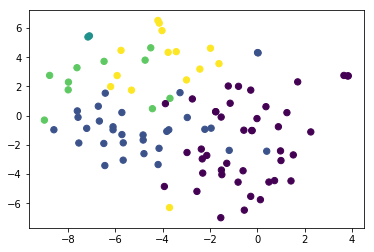

In [31]:
import matplotlib.pyplot as plt

plt.scatter(vecs2d[:,0], vecs2d[:,1], c=topic_assignment, s=40, cmap='viridis')
plt.savefig('cluster_distribution.png')

# Ebbeddings with RNN

In [12]:
from flair.embeddings import WordEmbeddings, DocumentRNNEmbeddings

glove_embedding = WordEmbeddings('glove')

document_lstm_embeddings = DocumentRNNEmbeddings([glove_embedding], rnn_type='LSTM')

In [13]:
embeddings_rnn=[]
for text in _input:
    sentence = Sentence(text)
    document_lstm_embeddings.embed(sentence)
    embeddings_rnn.append(sentence.get_embedding().tolist())

In [42]:
from sklearn.mixture import GaussianMixture

n_topics=5
print('Topic modelling for', n_topics, 'topics')
gmm = GaussianMixture(n_components=n_topics)#, covariance_type='full')

gmm.fit(embeddings_rnn)
topic_assignment_rnn = gmm.predict(embeddings_rnn)

Topic modelling for 5 topics


In [43]:
import numpy as np
cluster_centers_rnn=list()
for i in range(n_topics):
   # print(i)
    indices = np.where(topic_assignment_rnn==i)[0]
    center = np.array(embeddings_rnn)[indices].mean(axis=0)
    cluster_centers_rnn.append(center)

In [44]:
from sklearn.manifold import TSNE
tsne=TSNE()

%time vecs2d_rnn = tsne.fit_transform(embeddings_rnn)

Wall time: 1.7 s


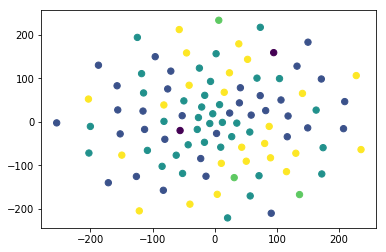

In [45]:
import matplotlib.pyplot as plt

plt.scatter(vecs2d_rnn[:,0], vecs2d_rnn[:,1],  c=topic_assignment_rnn, s=40, cmap='viridis')
plt.savefig('cluster_distribution_rnn.png')

# Vectorizing the text: Mean of Word Embeddings within a text

In [50]:
## Importing the Embeddings ##
from flair.embeddings import WordEmbeddings
from flair.embeddings import CharacterEmbeddings
from flair.embeddings import StackedEmbeddings
from flair.embeddings import FlairEmbeddings
from flair.embeddings import BertEmbeddings
from flair.embeddings import ELMoEmbeddings
from flair.embeddings import FlairEmbeddings

### Initialising embeddings (un-comment to use others) ###
#glove_embedding = WordEmbeddings('glove')
#character_embeddings = CharacterEmbeddings()
flair_forward  = FlairEmbeddings('news-forward-fast')
flair_backward = FlairEmbeddings('news-backward-fast')
#bert_embedding = BertEmbedding()
#elmo_embedding = ElmoEmbedding()

stacked_embeddings = StackedEmbeddings( embeddings = [ 
                                                       flair_forward, 
                                                       flair_backward
                                                      ])

In [79]:
# create a sentence #
sentence = Sentence(_input[0])
# embed words in sentence #
stacked_embeddings.embed(sentence)
for token in sentence:
    print(token.embedding)
# data type and size of embedding #
print(type(token.embedding))
# storing size (length) #
z = token.embedding.size()[0]

tensor([-7.9977e-02, -1.8273e-07,  5.6449e-07,  ..., -6.4426e-11,
        -5.6889e-05,  2.2074e-03])
tensor([-2.2195e-03, -3.3100e-07,  1.0275e-04,  ..., -1.1446e-08,
         1.1825e-04,  7.4121e-03])
tensor([-1.9718e-03,  8.0446e-07,  3.8752e-06,  ..., -1.0182e-07,
         6.2878e-04,  8.4182e-03])
tensor([ 8.1545e-04, -1.3507e-06,  2.0821e-05,  ..., -1.6964e-08,
        -4.7472e-05,  4.6065e-03])
tensor([-2.6375e-03, -1.2175e-05,  1.0272e-06,  ..., -6.4314e-09,
         2.1864e-05,  1.3656e-02])
tensor([-2.7124e-04, -9.3561e-07,  8.5733e-08,  ..., -6.0021e-09,
         5.1974e-06,  2.2156e-02])
tensor([ 1.3671e-03, -3.5592e-06,  1.6523e-05,  ...,  1.8562e-10,
         5.2463e-06,  3.4873e-03])
tensor([-1.9664e-03, -6.2788e-05,  1.7101e-04,  ..., -1.0146e-08,
        -2.9633e-06,  5.6776e-04])
tensor([-6.1459e-03,  1.8994e-06,  2.0691e-08,  ...,  1.1194e-09,
         5.2296e-05,  3.3456e-03])
tensor([-3.5354e-02,  1.1373e-06,  6.0272e-07,  ..., -4.4197e-09,
        -3.4824e-06,  1.1

In [80]:
import torch
from tqdm import tqdm ## tracks progress of loop ##

# creating a tensor for storing sentence embeddings #
s = torch.zeros(0,z)

# iterating Sentence (tqdm tracks progress) #
for text in tqdm(_input):   
    # empty tensor for words #
    w = torch.zeros(0,z)   
    sentence = Sentence(text)
    stacked_embeddings.embed(sentence)
    # for every word #
    for token in sentence:
     # storing word Embeddings of each word in a sentence #
      w = torch.cat((w,token.embedding.view(-1,z)),0)
    # storing sentence Embeddings (mean of embeddings of all words)   #
    s = torch.cat((s, w.mean(dim = 0).view(-1, z)),0)



  0%|                                                  | 0/100 [00:00<?, ?it/s]

  1%|▍                                         | 1/100 [00:23<39:12, 23.77s/it]

  2%|▊                                       | 2/100 [01:43<1:06:05, 40.47s/it]

  3%|█▏                                      | 3/100 [02:37<1:12:15, 44.69s/it]

  4%|█▌                                      | 4/100 [03:59<1:29:31, 55.95s/it]

  5%|██                                      | 5/100 [04:09<1:06:25, 41.95s/it]

  6%|██▌                                       | 6/100 [04:15<49:05, 31.34s/it]

  7%|██▉                                       | 7/100 [04:34<42:49, 27.63s/it]

  8%|███▎                                      | 8/100 [05:20<50:32, 32.97s/it]

  9%|███▊                                      | 9/100 [05:50<48:39, 32.08s/it]

 10%|████                                     | 10/100 [06:30<52:00, 34.67s/it]

 11%|████▌                                    | 11/100 [06:41<40:33, 27.35s/it]

 12%|████▉                

In [86]:
len(s)
type(s)

100

torch.Tensor

In [88]:
from sklearn.mixture import GaussianMixture

n_topics=5
print('Topic modelling for', n_topics, 'topics')
gmm = GaussianMixture(n_components=n_topics)#, covariance_type='full')

gmm.fit(s)
topic_assignment_s = gmm.predict(s)

Topic modelling for 5 topics


GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=5, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [89]:
import numpy as np
cluster_centers_s=list()
for i in range(n_topics):
   # print(i)
    indices = np.where(topic_assignment_s==i)[0]
    center = np.array(embeddings_rnn)[indices].mean(axis=0)
    cluster_centers_s.append(center)

In [90]:
from sklearn.manifold import TSNE
tsne=TSNE()

%time vecs2d_s = tsne.fit_transform(embeddings_rnn)

Wall time: 1.69 s


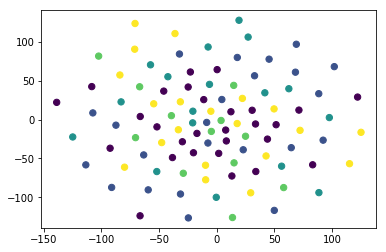

In [91]:
import matplotlib.pyplot as plt

plt.scatter(vecs2d_s[:,0], vecs2d_s[:,1],  c=topic_assignment_s, s=40, cmap='viridis')
plt.savefig('cluster_distribution_rnn.png')

In [20]:
sentence = Sentence(word)
document_embeddings.embed(sentence)
deembd = np.array(sentence.get_embedding())

de_embedding.embed(sentence)
docembd = np.array(sentence.get_embedding())
deembd - docembd

NameError: name 'word' is not defined

In [ ]:
from flair.embeddings import BertEmbeddings
bert_embeddings = BertEmbeddings()

  6%|█▌                       | 25484288/407873900 [02:40<2:20:03, 45504.87B/s]

In [ ]:
def generate_embeddings(text_list, flair_document_embedding_generator):
    """Generates Embeddings for a list of strings "text_list" using a flair document embedding object"""
    embeddings = []
    for _txt in tqdm(text_list):
        # TODO: should use segtok to split texts into sentences and then encode each sentence individually
        # as in this example:
        # https://github.com/zalandoresearch/flair/blob/master/resources/docs/TUTORIAL_2_TAGGING.md#tagging-a-list-of-sentences
        # create a flair sentence object


        if _txt == "":
            _txt = " "

        from segtok.segmenter import split_single
        sentences = [Sentence(sent, use_tokenizer=True) for sent in split_single(_txt)]

        # sentence = Sentence(_txt)
        try:
            # embed the sentence(s) using document embedding
            flair_document_embedding_generator.embed(sentences)
        except Exception as e:
            print('ERROR')
            print(sentence)
            print(sentence.get_embedding().shape)
            print(e)
            print()
        # store embedding
        emb = np.mean([np.array(sent.get_embedding()) for sent in sentences], axis=0).tolist()
        #emb = sentence.get_embedding().tolist()
        embeddings.append(emb)

    return np.array(embeddings)

In [21]:
# Extract words from vocabulary
   
words = list(vocab)
    
word_embeddings=[]
for word in words:
    
    sentence = Sentence(word)
    document_embeddings.embed(sentence)
    #de_embedding.embed(sentence)
    word_embeddings.append(sentence.get_embedding().tolist())
    
word_embeddings = np.array(word_embeddings)

In [22]:
# Calculate of every cluster center to each word in the vocabulary list
import sklearn
results = []
for center in cluster_centers:
    results.append(sklearn.metrics.pairwise.cosine_similarity(center.reshape(1,-1) ,word_embeddings))
results = np.array(results).squeeze(axis=1)

In [23]:
for idx in results.argmax(1):
    print(words[idx])

something
something
kind
government
something


In [30]:
import numpy as np
most_similar_words = np.array([res[::-1] for res in np.argsort(results,axis=1)])[:,:5]

for sim_words in most_similar_words:
    for idx in sim_words:
        print(words[idx])
    print()

something
series
thing
game
things

something
thing
technology
kind
things

kind
something
thing
things
indeed

government
business
team
itself
indeed

something
kind
business
things
either



In [26]:
words[9266]

'expensivesharesso'

In [24]:
np.array(results).reshape(len(results),len(results[0])).shape

(17, 1787)

<Figure size 432x288 with 0 Axes>

(-0.5, 399.5, 199.5, -0.5)

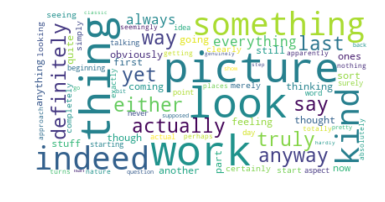

In [26]:
import sklearn
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Choose topic number and number of words should be used for the word cloud 
topic_number= 7
words_topic=100
res_topic=[]
for res in results[topic_number]:
    res_topic.append(res[0][0])

d ={'word': words, 'cosine_sim': res_topic}
topic_df = pd.DataFrame(data=d)

topic_sorted = topic_df.sort_values(by=['cosine_sim'],ascending=False)

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text = topic_sorted['word'][0:words_topic].tolist()
text = ', '.join(text)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# # Testing


In [18]:
# multiple output lines 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [160]:
import sklearn
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial import distance
index=0
#distance.euclidean(word_embeddings[index],cluster_centers[15])
#cosine_similarity(word_embeddings[index],cluster_centers[15])
word_array = np.array(word_embeddings[index])
sklearn.metrics.pairwise.cosine_similarity(word_array.reshape(1,-1),cluster_centers[15].reshape(1,-1))
#scipy.spatial.distance.euclidean(word_embeddings[10],cluster_centers[15])
#test_distances=[score for score in word_embeddings distance.euclidean(cluster_centers[0],word_embeddings)]

array([[0.45156825]])

In [203]:
res_0=[]
for res in results[0]:
    res_0.append(res[0][0])

In [213]:
import pandas as pd
d ={'word': words, 'cosine_sim': res_0}
topic_0 = pd.DataFrame(data=d)

In [220]:
topic_0_sorted = topic_0.sort_values(by=['cosine_sim'],ascending=False)

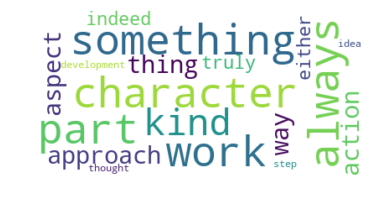

In [243]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text = topic_0_sorted['word'][0:20].tolist()
text = ', '.join(text)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [241]:
text = topic_0_sorted['word'][0:20]
text.tolist()[0]

'work'

In [99]:
from scipy.spatial import distance
distance.euclidean(word_embeddings[4], cluster_centers[0])

1.3556098478181269